# SESSION: The eeglab EEG structure

COURSE: Neural signal processing and analysis: Zero to hero

TEACHER: Mike X Cohen, sincxpress.com

**Goal:** Familiarize yourself with the sample data and the **MNE** structure (eeglab is for MATLAB, MNE is for Python)

By using MNE in these exercises, you will be more prepared for running your own EEG analyses with the MNE library in the future.

In [1]:
import sys
sys.path.insert(1, '../') #used to so that we can find our custom utils library later

# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from utils import * #contains custom functions for this course

In [2]:
# EEG sample data
eeg = read_sampleEEGdata("../data/sampleEEGdata.mat")

Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated


Now, explore a bit...
Here is a translation dictionary for the fields that Cohen points out

| MATLAB term | MNE term | notes |
| ----------- | -------- | ----- |
| nbchan      | "Channels: EEG" | in MNE, make sure you pay attention to the right type of channel |
| trials      | "Events" | access with `len(eeg.events)` |
| pnts        | "Time points" | access with `len(eeg.times)` |
| srate       | "Sampling Rate" | access with `eeg.info['sfreq']` |
| xmin        | "Time Range" (lowest value) | access with `eeg.times` |
| xmax        | "Time Range" (highest value) | access with `eeg.times` |
| data        | `eeg.get_data()` | -------- |
| chanlocs    | `eeg.get_montage()` | -------- |
| epoch       | "Events" | -------- |


In [3]:
eeg

<EpochsArray | 99 events (all good), -1 – 1.496 s (baseline off), ~31.0 MiB, data loaded,
 '1': 99>

## Exploring the "Chanlocs" (i.e. MNE montage)

In [4]:
montage = eeg.get_montage()
montage.dig

[<DigPoint |        LPA : (-85.0, 0.0, 0.0) mm      : head frame>,
 <DigPoint |     Nasion : (0.0, 85.0, 0.0) mm       : head frame>,
 <DigPoint |        RPA : (85.0, 0.0, 0.0) mm       : head frame>,
 <DigPoint |     EEG #1 : (-26.1, 80.8, -4.0) mm    : head frame>,
 <DigPoint |     EEG #2 : (-49.7, 68.7, -6.0) mm    : head frame>,
 <DigPoint |     EEG #3 : (-31.5, 76.2, 20.8) mm    : head frame>,
 <DigPoint |     EEG #4 : (-26.0, 59.9, 54.4) mm    : head frame>,
 <DigPoint |     EEG #5 : (-48.2, 57.6, 39.9) mm    : head frame>,
 <DigPoint |     EEG #6 : (-63.1, 54.0, 18.1) mm    : head frame>,
 <DigPoint |     EEG #7 : (-68.4, 49.9, -7.5) mm    : head frame>,
 <DigPoint |     EEG #8 : (-80.4, 26.2, -8.5) mm    : head frame>,
 <DigPoint |     EEG #9 : (-76.2, 28.8, 24.2) mm    : head frame>,
 <DigPoint |    EEG #10 : (-59.3, 31.0, 52.5) mm    : head frame>,
 <DigPoint |    EEG #11 : (-32.4, 32.4, 71.6) mm    : head frame>,
 <DigPoint |    EEG #12 : (-34.5, 0.0, 77.7) mm     : head fra

Note how the method above for inspecting the channels does not give you the names of the eeg channels. A more intuitive method is to pick your channel, as done below.

In [5]:
channel=eeg.ch_names[39-1] # Matlab starts at 1, Python (usually) starts at 0, so subtract 1 from Cohen's number
print(channel)
print(eeg.get_montage().get_positions()["ch_pos"][channel])

F2
[0.02602544 0.05987441 0.05443098]


Keep in mind that with the above code, the coordinates display in metres. Also keep in mind that MNE seems to have a different order for the coordinates than Cohen's MATLAB.

MATLAB order X,Y,Z

MNE order Y,X,Z

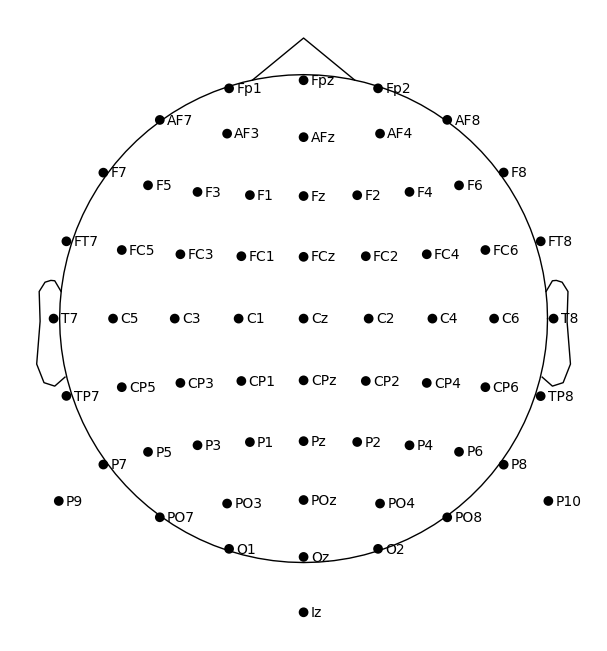

In [6]:
#plot the topdown view of the channels
topdownplot=eeg.plot_sensors(show_names=True,sphere='eeglab',show=False) #use show=False if it is displaying twice

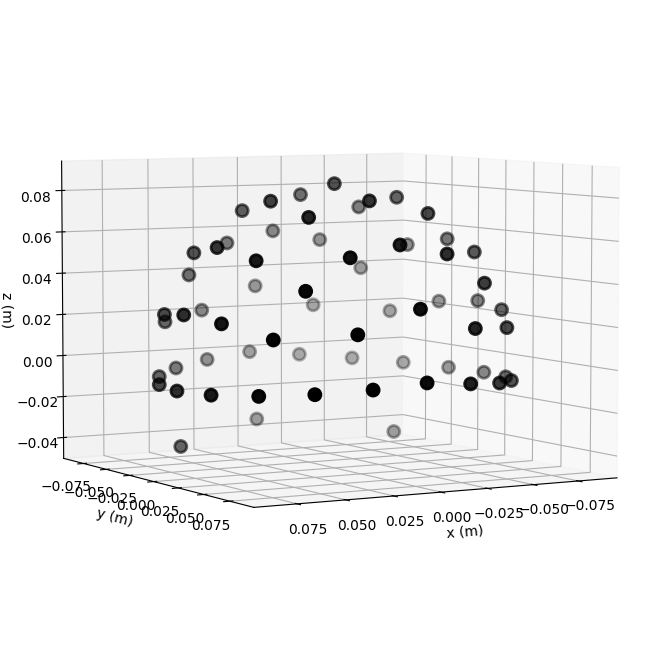

In [7]:
#plotting the channels 3d version
fig_3d = eeg.plot_sensors(kind="3d",show=False) #don't show the figure right away
fig_3d = fig_3d.gca().view_init(azim=60, elev=5) #adjusts the angle, you can play around with these numbers

# you can't rotate this figure

## Inspect the Epochs information

This section is TODO! still need to update the read_sampleData code to include event duration, latency, and type information

In [8]:
# TODO add event information (event latency and event type) into the read sample data code

## Plotting ERPs

In [9]:
# compute the ERP on each channel
erp = eeg.average()

Need more than one channel to make topography for eeg. Disabling interactivity.


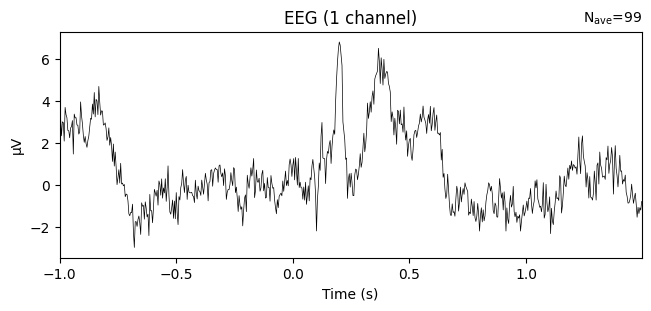

In [10]:
# pick a channel and plot one ERP
erp_timecourse = erp.plot(picks="FCz", show = False)

## Plot Topographical Maps

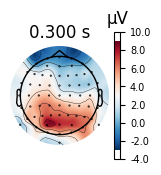

In [ ]:
time2plot = .300 # IMPORTANT, in s, not ms
erp_topo = erp.plot_topomap(times = time2plot,sphere = "eeglab",show = False)